<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/CSC645/blob/master/emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
file=files.upload()
!mkdir /root/.kaggle
!mv kaggle.json  /root/.kaggle
!kaggle datasets download -d msambare/fer2013


Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip fer2013.zip>/dev/null



replace test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

NameError: ignored

In [3]:
import os


In [1]:
import tensorflow as tf

In [2]:
image_size=(48,48)
dataset=tf.keras.preprocessing.image_dataset_from_directory("train",batch_size=64,image_size=image_size,
                                                            shuffle=True,color_mode="grayscale")

Found 28709 files belonging to 7 classes.


In [3]:
dataset.class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [4]:
it=iter(dataset)


In [5]:
item=it.next()

In [6]:
print(item[0].shape,item[1].shape)

(64, 48, 48, 1) (64,)


tf.Tensor(
[4 4 6 2 4 4 4 5 4 2 3 3 3 3 5 2 5 0 5 3 0 6 4 2 4 3 4 3 4 2 3 4 3 6 3 2 3
 4 4 4 0 2 3 0 0 3 4 5 5 6 6 5 6 3 0 5 3 2 3 2 0 0 4 3], shape=(64,), dtype=int32)


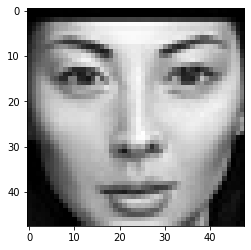

In [7]:
import matplotlib.pyplot as plt
img=item[0][0]/255.
import numpy as np
img=np.squeeze(img)
plt.imshow(img,cmap="gray")
print(item[1])

In [14]:
input=tf.keras.layers.Input(shape=(image_size[0],image_size[1],1))
rescale=tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)(input)
first_layer=tf.keras.layers.Conv2D(32,(3,3),activation="relu")(rescale)
second_layer=tf.keras.layers.Conv2D(64,(3,3))(first_layer)
third_layer=tf.keras.layers.Flatten()(second_layer)
output=tf.keras.layers.Dense(7,activation="softmax")(third_layer)

model=tf.keras.Model(inputs=input,outputs=output)

In [26]:

from tensorflow.keras.layers import Dense,Conv2D,Input,MaxPool2D,Dropout,Flatten,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Input(shape=(image_size[0],image_size[1],1)))
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(.5))
    
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax', name = 'Output'))

In [27]:
model.compile(optimizer="Adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics="accuracy")

In [16]:
test_dataset=tf.keras.preprocessing.image_dataset_from_directory("test",batch_size=64,image_size=image_size,
                                                            shuffle=True,color_mode="grayscale")

Found 7178 files belonging to 7 classes.


In [28]:
model.fit(dataset,validation_data=test_dataset,epochs=20)

Epoch 1/20
449/449 [==============================] - 20s 45ms/step - loss: 1.7231 - accuracy: 0.3006 - val_loss: 1.5025 - val_accuracy: 0.4253
Epoch 2/20
449/449 [==============================] - 20s 45ms/step - loss: 1.4373 - accuracy: 0.4458 - val_loss: 1.3138 - val_accuracy: 0.4941
Epoch 3/20
449/449 [==============================] - 20s 45ms/step - loss: 1.3163 - accuracy: 0.4965 - val_loss: 1.2212 - val_accuracy: 0.5270
Epoch 4/20
449/449 [==============================] - 20s 45ms/step - loss: 1.2445 - accuracy: 0.5269 - val_loss: 1.1772 - val_accuracy: 0.5471
Epoch 5/20
449/449 [==============================] - 20s 45ms/step - loss: 1.1930 - accuracy: 0.5465 - val_loss: 1.1482 - val_accuracy: 0.5646
Epoch 6/20
449/449 [==============================] - 20s 45ms/step - loss: 1.1487 - accuracy: 0.5638 - val_loss: 1.1565 - val_accuracy: 0.5573
Epoch 7/20
449/449 [==============================] - 21s 46ms/step - loss: 1.1084 - accuracy: 0.5832 - val_loss: 1.1152 - val_accuracy:

In [29]:
model.evaluate(test_dataset)

113/113 [==============================] - 3s 26ms/step - loss: 1.0918 - accuracy: 0.6071


[1.0917868614196777, 0.6071329116821289]

In [31]:
#tf.math.confusion_matrix(model.predict(test_dataset),dataset)
y=model.predict(test_dataset)

In [33]:
y.shape

(7178, 7)

In [34]:
import pandas as pd


In [38]:
df=pd.DataFrame(y)

In [40]:
y=df.idxmax(axis=1)

In [44]:
dataset.enumerate()

<ZipDataset shapes: ((), ((None, 48, 48, 1), (None,))), types: (tf.int64, (tf.float32, tf.int32))>

In [45]:
import tensorflow_datasets as tfds

In [48]:
for imgs,labels in dataset.take(-1):
  numpy_images=imgs.numpy()
  numpy_labels=labels.numpy()

In [49]:
numpy_images.shape

(37, 48, 48, 1)

In [50]:
numpy_labels.shape

(37,)

In [51]:
y = np.concatenate([y for x, y in dataset], axis=0)

In [52]:
y.shape

(28709,)